# Hybrid Images

## TAG-DSP Advanced Lecture #1

In [39]:
# let's import some packages
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage, fftpack
from PIL import Image
import skimage

%matplotlib inline

### What's a hybrid image?

Hybrid imaging is a computational photography technique which produces static images with two interpretations. If you look at the image from very close, you see one image, but if you look from far away, then you see another!

Here's an example of a hybrid image:

![Hybrid image by Blade Chapman](imgs/combined.png)
(Photo by Blade Chapman)

### How do they work?

This is actually an application of a superposition of two image filters onto one. The idea is that we can combine a low-pass filtered image with a high-pass filtered image, and exploiting the difference in perception to see the difference when you look at it from a distance versus when you see it up close. The high-pass filtered image can be seen far away, and the low-pass filtered image can be seen up close. Let's see why this happens by actually low-pass filtering the image itself!

### Low-Pass Filtering an Image 

Let's start with one of the original images.

In [40]:
def plot(data, title):
    plot.i += 1
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

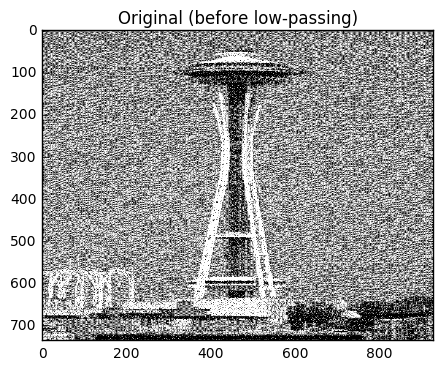

In [64]:
lp_add = Image.open("imgs/im1.png").convert('1')
plot(lp_add, "Original (before low-passing)")
plot.i += 1

Let's take a look at the 2-dimensional FFT of the image, to visualize the frequencies in the image:

In [66]:
# Let's take a look at the FFT of the signal
def fft2d(image):
    return np.abs(fftpack.fftshift(fftpack.fft2(image))) ** 2

In [ ]:
lp_image_fft = fft2d(lp_add)
plot(lp_image_fft, "FFT of Original Image before low-passing")

We can see we have quite a bit of frequencies in the middle, and not a lot near the edges. The structure implies that there's a lot of vertical frequency (as can be seen by the tower). Now, let's low-pass the image, and see the result of the original and its FFT. To low-pass the filter, we use a Gaussian filter with a radius of 10:

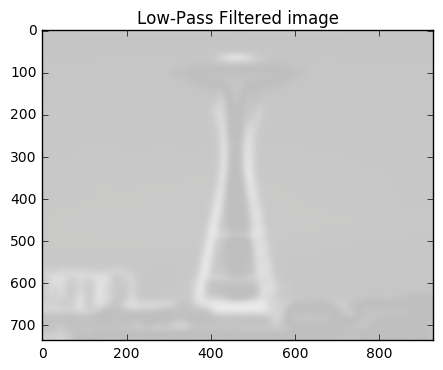

In [48]:
lowpass = ndimage.gaussian_filter(lp_add, 10)
plot(lowpass, 'Low-Pass Filtered image')

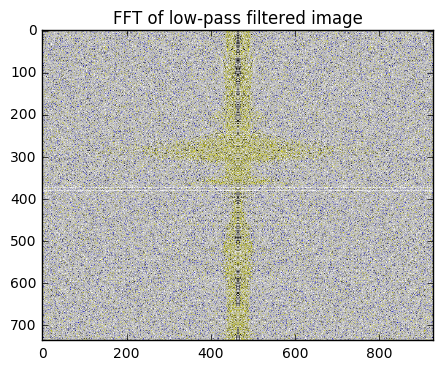

In [49]:
lowpass_fft = fft2d(lowpass)
plot(lowpass_fft, 'FFT of low-pass filtered image')

As we can see, the FFT of the low-passed image looks significantly different than the original, as the repeating components are the only parts of this that are preserved. That corresponds to the underlying structure of the image, which is a large tower we can superimpose over the other one.

### High-Pass Filtering an Image

A high-pass filter essentially acts as an opposite to the low-pass filter. It filters out the low frequencies in the image, and keeps the high ones. What this essentially means is that the high-pass filter essentially acts as an edge-detection filter. It preserves edges and throws away everything else.

So, let's load our second image, and high-pass filter it.

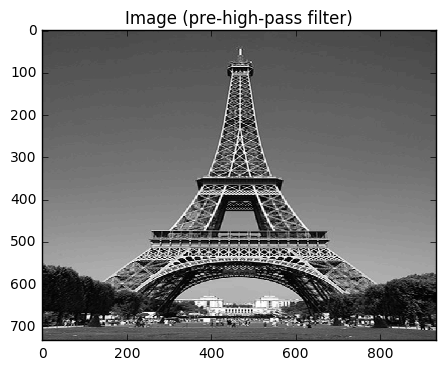

In [51]:
img_hp = Image.open("imgs/im2.png")
plot(img_hp, "Image (pre-high-pass filter)")

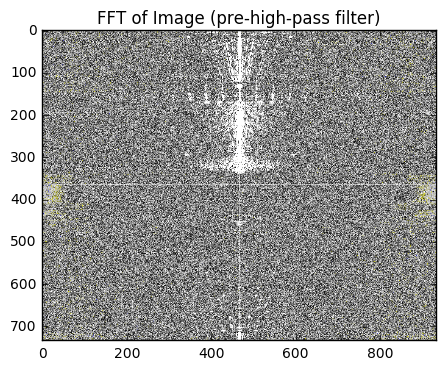

In [53]:
img_hp_fft = fft2d(img_hp)
plot(img_hp_fft, "FFT of Image (pre-high-pass filter)")

To create a high-pass filter, we can simply subtract the low-passed filtered image from the high-pass filtered image. This is equivalent to convolving the original image with the identity matrix minus the low-pass kernel (or, in LaTeX terms:)

$$I_{hp} = I_{orig} - I_{lp} = I_{orig} * (K_{Identity} - K_{lp})$$

Let's see this in Python:

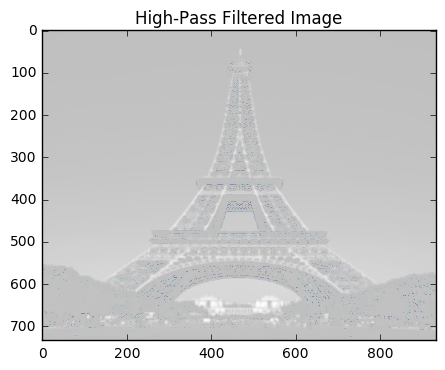

In [59]:
img_lp = ndimage.gaussian_filter(img_hp, 2)
img_hp_filtered = img_hp - img_lp

plot(img_hp_filtered, "High-Pass Filtered Image")

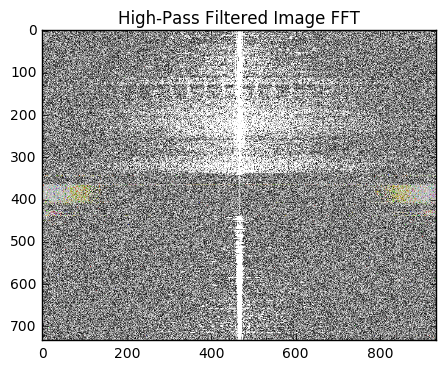

In [61]:
img_hp_fft = fft2d(img_hp_filtered)
plot(img_hp_fft, "High-Pass Filtered Image FFT")

Now, we can add the two images together to get the final "hybrid image":

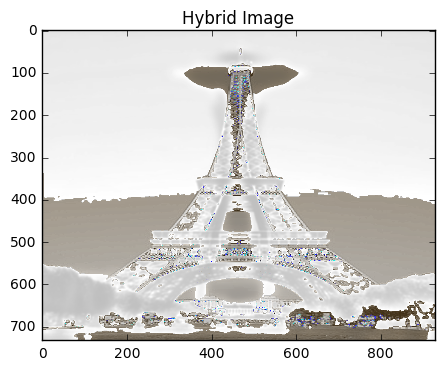

In [63]:
hybrid_image = img_hp_filtered[0:733,0:928,:] + lowpass[0:733,0:928,:]

plot(hybrid_image, "Hybrid Image")